In [37]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import seaborn as sns
from math import e
from math import log
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

import matplotlib.font_manager as font_manager
font_files = font_manager.findSystemFonts(fontpaths=['/n/fs/nlp-jl5167/fonts',])
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
plt.rcParams["font.family"] = "Source Serif Pro"

matplotlib.font_manager.findSystemFonts(fontpaths='/n/fs/nlp-jl5167/fonts', fontext='ttf')

/n/fs/nlp-jl5167/miniconda3/envs/fid/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  from ipykernel import kernelapp as app


['/n/fs/nlp-jl5167/fonts/sourcesanspro/SourceSansPro-LightItalic.ttf',
 '/n/fs/nlp-jl5167/fonts/Source_Serif_Pro/SourceSerifPro-SemiBoldItalic.ttf',
 '/n/fs/nlp-jl5167/fonts/sourcesanspro/SourceSansPro-SemiBold.ttf',
 '/n/fs/nlp-jl5167/fonts/Source_Serif_Pro/SourceSerifPro-Light.ttf',
 '/n/fs/nlp-jl5167/fonts/sourcesanspro/SourceSansPro-Light.ttf',
 '/n/fs/nlp-jl5167/fonts/sourcesanspro/SourceSansPro-Black.ttf',
 '/n/fs/nlp-jl5167/fonts/Source_Serif_Pro/SourceSerifPro-Bold.ttf',
 '/n/fs/nlp-jl5167/fonts/sourcesanspro/SourceSansPro-SemiBoldItalic.ttf',
 '/n/fs/nlp-jl5167/fonts/Source_Serif_Pro/SourceSerifPro-BlackItalic.ttf',
 '/n/fs/nlp-jl5167/fonts/Source_Serif_Pro/SourceSerifPro-Black.ttf',
 '/n/fs/nlp-jl5167/fonts/Source_Serif_Pro/SourceSerifPro-SemiBold.ttf',
 '/n/fs/nlp-jl5167/fonts/Source_Serif_Pro/SourceSerifPro-LightItalic.ttf',
 '/n/fs/nlp-jl5167/fonts/Source_Serif_Pro/SourceSerifPro-Regular.ttf',
 '/n/fs/nlp-jl5167/fonts/sourcesanspro/SourceSansPro-BlackItalic.ttf',
 '/n/fs/n

<Figure size 216x216 with 0 Axes>

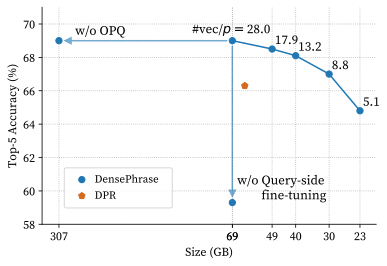

In [225]:
%config InlineBackend.figure_format = 'svg'


##### Data part #####

xs = [307, 69, 49, 40, 30, 23, 69]
ys = [69.0, 69.0, 68.5, 68.1, 67.0, 64.8, 59.3]
vec_per_p = ["", "#vec/$p =$28.0", "17.9", "13.2", "8.8", "5.1", "w/o QSFT"]

new_xs = [62]
new_ys = [66.3]
new_vec_per_p = [""]

##### Data part end #####
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(3, 3))

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

fig, ax = plt.subplots()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# ax.xaxis.set_ticks_position('none')
# ax.yaxis.set_ticks_position('none')
ax.set_axisbelow(True)

plt.grid(b=True, linestyle='dotted')

my_cmap = sns.color_palette("rocket_r", as_cmap=True)
points = plt.scatter(xs[:-1], ys[:-1], s=40, color=['#1f77b4']*(len(xs)-1), label='DensePhrase')
# colorbar = plt.colorbar(points)

# Scatter and arrow
for i in range(len(vec_per_p)-1):
    if i in [0, 1]:
        ax.annotate(vec_per_p[i], (xs[i]+28.5, ys[i]+0.45), fontsize=13)
    else:
        ax.annotate(vec_per_p[i], (xs[i]-3.5 * (1/(i+1)), ys[i]+0.3), fontsize=13)
    
    if i in [1,2,3,4]:
        ax.plot([xs[i],xs[i+1]], [ys[i], ys[i+1]], color='#1f77b4')

# w/o OPQ
arrow = mpatches.FancyArrowPatch((xs[1]+2.0, ys[1]), (xs[0]-8, ys[0]),
                                 mutation_scale=5, color='tab:blue', alpha=0.6, linestyle='--', arrowstyle='simple, head_width=1.5, head_length=1.5', linewidth=0.5)
ax.add_patch(arrow)
ax.annotate('w/o OPQ', (xs[0]-40, ys[0]+0.35), weight='normal', fontsize=13)

        
        
# W/o QSFT scatter / arrow 
plt.scatter(xs[-1], ys[-1], s=40, color=['#1f77b4'])
arrow = mpatches.FancyArrowPatch((xs[1], ys[1]-0.2), (xs[-1], ys[-1]+0.2),
                                 mutation_scale=5, color='tab:blue', alpha=0.6, linestyle='--', arrowstyle='simple, head_width=1.5, head_length=1.5', linewidth=0.5)
ax.add_patch(arrow)
ax.annotate('w/o Query-side\n        fine-tuning', (66.2, 59.5), weight='normal', fontsize=13)

# DPR scatter
plt.scatter(new_xs[0], new_ys[0], s=45, color=['#D2691E'], label='DPR', marker='p')
ax.annotate(new_vec_per_p[0], (new_xs[0]-2.0, new_ys[0]+0.5))

# DensePhrases arrow
dx = 20
dy = -1.2
# arrow = mpatches.FancyArrowPatch((99, 69.03), (139.0, 69.03+dy-0.2),
#                                  mutation_scale=6, color='#1f77b4', arrowstyle='-')
# ax.add_patch(arrow)
# ax.annotate('DensePhrases', (273.0, 67.1), weight="bold")

# DPR arrow
# arrow = mpatches.FancyArrowPatch((62.0, 66.3), (61+dx, 66.3+dy-0.1),
#                                  mutation_scale=6, color='#D2691E', arrowstyle='-')
# ax.add_patch(arrow)
# ax.annotate('DPR', (100.0, 64.2+0.4), weight="bold")

ax.set_xscale('log')
plt.xlabel('Size (GB)', fontsize=12)
plt.ylabel('Top-5 Accuracy (%)', fontsize=12)
plt.xlim((355, 20))
plt.ylim((58.0, 71))
plt.xticks(xs, xs, fontsize=12)
plt.yticks(fontsize=12)

legend_properties = {}
legend = plt.legend(loc=3, fontsize=11, borderpad=0.6, bbox_to_anchor=(0.05, 0.05))
shift = -7
for t in legend.get_texts():
    t.set_ha('left') # ha is alias for horizontalalignment
    t.set_position((shift,0))

plt.minorticks_off()

plt.savefig('size_top5.pdf', format='pdf', bbox_inches='tight')


<Figure size 216x216 with 0 Axes>

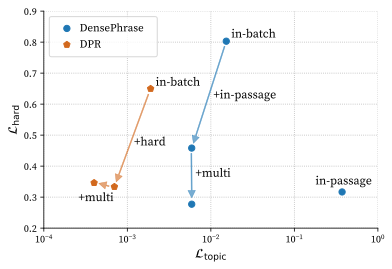

In [194]:
##### %config InlineBackend.figure_format = 'svg'


##### Data part #####

# BM25
xs = [0.3727, 0.0153, 0.0059, 0.0059, 0.0007, 0.0004, 0.0019]
ys = [0.3166, 0.803, 0.4582, 0.2771, 0.3335, 0.3461, 0.6498]

# Syn
# xs = [0.3786, 0.0191, 0.008, 0.0074, 0.0013, 0.0012, 0.0011]
# ys = [0.2719, 0.5494, 0.2693, 0.2112, 0.3165, 0.2803, 0.5546]
vec_per_p = ['in-passage', "in-batch", "", "", "", "", "in-batch"]

new_xs = [62]
new_ys = [66.3]
new_vec_per_p = [""]

##### Data part end #####

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(3, 3))

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

fig, ax = plt.subplots()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# ax.xaxis.set_ticks_position('none')
# ax.yaxis.set_ticks_position('none')
ax.set_axisbelow(True)

plt.grid(b=True, linestyle='dotted')

my_cmap = sns.color_palette("rocket_r", as_cmap=True)
points = plt.scatter(xs[:-3], ys[:-3], s=40, color=['#1f77b4']*4, label='DensePhrase')
points = plt.scatter(xs[-3:], ys[-3:], s=45, color=['#D2691E']*3, label='DPR', marker='p')
# colorbar = plt.colorbar(points)

# Scatter and arrow
for i in range(len(vec_per_p)):
    if i in [0]:
        ax.annotate(vec_per_p[i], (xs[i]*(0.48), ys[i]*(1.077)), fontsize=12)
    else:
        ax.annotate(vec_per_p[i], (xs[i]*(1.15), ys[i]*(1.015)), fontsize=12)
    
    # if i in [1,2,3,4]:
    #     ax.plot([xs[i],xs[i+1]], [ys[i], ys[i+1]], color='#1f77b4')

# DPR (+hard)
arrow = mpatches.FancyArrowPatch((xs[6]*0.96, ys[6]*0.982), (xs[4]*1.03, ys[4]*1.028),
                                 mutation_scale=5, color='#D2691E', alpha=0.6, arrowstyle='simple, head_width=1.5, head_length=1.5', linewidth=0.5)
ax.add_patch(arrow)
ax.annotate('+hard', (xs[4]*(1.72), ys[4]*(1.4)), weight='normal', fontsize=12)

# DPR (+multi)
arrow = mpatches.FancyArrowPatch((xs[4]*0.91, ys[4]*1.0), (xs[5]*1.08, ys[5]*1.00),
                                 mutation_scale=5, color='#D2691E', alpha=0.6, arrowstyle='simple, head_width=1.5, head_length=1.5', linewidth=0.5, )
ax.add_patch(arrow)
ax.annotate('+multi', (xs[5]*(0.65), ys[5]*(0.83)), weight='normal', fontsize=12)

# DensePhrases (+in-passage)
arrow = mpatches.FancyArrowPatch((xs[1]*0.971, ys[1]*0.987), (xs[2]*1.03, ys[2]*1.02),
                                 mutation_scale=5, color='#1f77b4', alpha=0.6, arrowstyle='simple, head_width=1.5, head_length=1.5', linewidth=0.5)
ax.add_patch(arrow)
ax.annotate('+in-passage', (xs[2]*(1.82), ys[2]*(1.35)), weight='normal', fontsize=12)

# DensePhrases (+multi
arrow = mpatches.FancyArrowPatch((xs[2]*0.99, ys[2]*0.977), (xs[3]*1.001, ys[3]*1.05),
                                 mutation_scale=5, color='#1f77b4', alpha=0.6, arrowstyle='simple, head_width=1.5, head_length=1.5', linewidth=0.5)
ax.add_patch(arrow)
ax.annotate('+multi', (xs[3]*(1.11), ys[3]*(1.32)), weight='normal', fontsize=12)

ax.set_xscale('log')
plt.xlabel('$\mathcal{L}_\mathrm{topic}$', size=13)
plt.ylabel('$\mathcal{L}_\mathrm{hard}$', size=13)
plt.xlim((0.0001, 1))
plt.ylim((0.2, 0.9))
# plt.xticks(xs, xs)

legend_properties = {}
legend = plt.legend(loc=2, fontsize=11, borderpad=0.6)
shift = -7
for t in legend.get_texts():
    t.set_ha('left') # ha is alias for horizontalalignment
    t.set_position((shift,0))
# plt.title('SST-2')
plt.minorticks_off()

plt.savefig('analysis-bm25.pdf', format='pdf', bbox_inches='tight')


<Figure size 216x216 with 0 Axes>

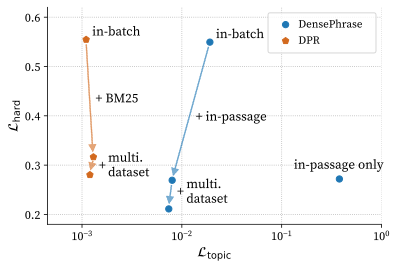

In [217]:
##### %config InlineBackend.figure_format = 'svg'


##### Data part #####

# BM25
# xs = [0.3727, 0.0153, 0.0059, 0.0059, 0.0007, 0.0004, 0.0019]
# ys = [0.3166, 0.803, 0.4582, 0.2771, 0.3335, 0.3461, 0.6498]

# Syn
xs = [0.3786, 0.0191, 0.008, 0.0074, 0.0013, 0.0012, 0.0011]
ys = [0.2719, 0.5494, 0.2693, 0.2112, 0.3165, 0.2803, 0.5546]
vec_per_p = ['in-passage only', "in-batch", "", "", "", "", "in-batch"]

new_xs = [62]
new_ys = [66.3]
new_vec_per_p = [""]

##### Data part end #####

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(3, 3))

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

fig, ax = plt.subplots()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# ax.xaxis.set_ticks_position('none')
# ax.yaxis.set_ticks_position('none')
ax.set_axisbelow(True)

plt.grid(b=True, linestyle='dotted')

my_cmap = sns.color_palette("rocket_r", as_cmap=True)
points = plt.scatter(xs[:-3], ys[:-3], s=40, color=['#1f77b4']*4, label='DensePhrase')
points = plt.scatter(xs[-3:], ys[-3:], s=45, color=['#D2691E']*3, label='DPR', marker='p')
# colorbar = plt.colorbar(points)

# Scatter and arrow
for i in range(len(vec_per_p)):
    if i in [0]:
        ax.annotate(vec_per_p[i], (xs[i]*(0.35), ys[i]*(1.077)), fontsize=13)
    else:
        ax.annotate(vec_per_p[i], (xs[i]*(1.15), ys[i]*(1.015)), fontsize=13)
    
    # if i in [1,2,3,4]:
    #     ax.plot([xs[i],xs[i+1]], [ys[i], ys[i+1]], color='#1f77b4')

# DPR (+hard)
arrow = mpatches.FancyArrowPatch((xs[6]*1.00, ys[6]*0.989), (xs[4]*0.99, ys[4]*1.02),
                                 mutation_scale=5, color='#D2691E', alpha=0.6, linestyle='--', arrowstyle='simple, head_width=1.5, head_length=1.5', linewidth=0.5)
ax.add_patch(arrow)
ax.annotate('+ BM25', (xs[4]*(1.05), ys[4]*(1.35)), weight='normal', fontsize=13)

# DPR (+multi)
arrow = mpatches.FancyArrowPatch((xs[4]*1.00, ys[4]*0.987), (xs[5]*1.00, ys[5]*1.02),
                                 # mutation_scale=5, color='#D2691E', arrowstyle='simple, head_width=1.4, head_length=1.4', linewidth=0.5, connectionstyle='arc3,rad=-1.5')
                                 mutation_scale=5, color='#D2691E', alpha=0.6, linestyle='--', arrowstyle='simple, head_width=1.5, head_length=1.5', linewidth=0.5)
ax.add_patch(arrow)
ax.annotate('+', (xs[5]*(1.23), ys[5]*(1.04)), weight='normal', fontsize=13)
ax.annotate('multi.\ndataset', (xs[5]*(1.52), ys[5]*(0.99)), weight='normal', fontsize=13)

# DensePhrases (+in-passage)
arrow = mpatches.FancyArrowPatch((xs[1]*0.979, ys[1]*0.989), (xs[2]*1.01, ys[2]*1.02),
                                 mutation_scale=5, color='#1f77b4', alpha=0.6, linestyle='--', arrowstyle='simple, head_width=1.5, head_length=1.5', linewidth=0.5)
ax.add_patch(arrow)
ax.annotate('+ in-passage', (xs[2]*(1.72), ys[2]*(1.45)), weight='normal', fontsize=13)

# DensePhrases (+multi)
arrow = mpatches.FancyArrowPatch((xs[2]*0.99, ys[2]*0.977), (xs[3]*1.000, ys[3]*1.03),
                                 mutation_scale=5, color='#1f77b4', alpha=0.6, linestyle='--', arrowstyle='simple, head_width=1.5, head_length=1.5', linewidth=0.5)
ax.add_patch(arrow)
ax.annotate('+', (xs[3]*(1.21), ys[3]*(1.13)), weight='normal', fontsize=13)
ax.annotate('multi.\ndataset', (xs[3]*(1.50), ys[3]*(1.06)), weight='normal', fontsize=13)

ax.set_xscale('log')
plt.xlabel('$\mathcal{L}_\mathrm{topic}$', size=14)
plt.ylabel('$\mathcal{L}_\mathrm{hard}$', size=14)
plt.xlim((0.00045, 1))
plt.ylim((0.18, 0.62))
# plt.xticks(xs, xs)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.locator_params(axis='y', nbins=5)

legend_properties = {}
legend = plt.legend(loc=1, fontsize=11, borderpad=0.6)
shift = -7
for t in legend.get_texts():
    t.set_ha('left') # ha is alias for horizontalalignment
    t.set_position((shift,0))
# plt.title('SST-2')
plt.minorticks_off()

plt.savefig('analysis-syn.pdf', format='pdf', bbox_inches='tight')

<Figure size 216x216 with 0 Axes>

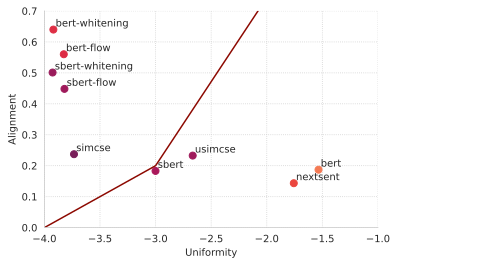

In [36]:
%config InlineBackend.figure_format = 'svg'


##### Data part #####

# name = ["dummy2", "dummy", "bert", "bert-whitening", "bert-flow", "sbert", "sbert-whitening", "sbert-flow", "usimcse", "simcse", "nextsent", "qqp", "delete"]
name = ["dummy2", "dummy", "bert", "bert-whitening", "bert-flow", "sbert", "sbert-whitening", "sbert-flow", "usimcse", "simcse", "nextsent"]
#uniform = [-0.5, -0.5, -1.534595966, -3.919344885, -3.825662374, -3.000590563, -3.926318082, -3.819641113, -3.470686913, -3.733785629, -2.67996335]
#align = [0.45, 0.45,  0.1870056987, 0.6398271236, 0.5600939989, 0.1830418855, 0.5010654535, 0.4481908679, 0.3292487264, 0.2371332645, 0.2198498696]
#performance = np.array([40, 100, 56.7, 66.28, 66.55, 74.89, 77, 76.23, 74.54, 81.57, 64.05])

uniform = [-0.5, -0.5, -1.534595966, -3.919344885, -3.825662374, -3.000590563, -3.926318082, -3.819641113, -2.666135787963867, -3.733785629, -1.7568968534469604]
align = [0.45, 0.45,  0.1870056987, 0.6398271236, 0.5600939989, 0.1830418855, 0.5010654535, 0.4481908679, 0.23262085020542145, 0.2371332645, 0.1433642953634262]
performance = np.array([40, 100, 56.7, 66.28, 66.55, 74.89, 77, 76.23, 76.3, 81.57, 63.1])



##### Data part end #####


plt.figure(figsize=(3, 3))

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

fig, ax = plt.subplots()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.grid(b=True, linestyle='dotted')

my_cmap = sns.color_palette("rocket_r", as_cmap=True)
points = plt.scatter(uniform, align, c=performance, s=50, cmap=my_cmap)
colorbar = plt.colorbar(points)
#for i in range(len(name)):
#s    ax.annotate(name[i], (uniform[i], align[i]))


plt.xlabel('Uniformity')
plt.ylabel('Alignment')
plt.xlim((-4, -1.0))
plt.ylim((0, 0.7))
# plt.legend(loc=4)
# plt.title('SST-2')

plt.savefig('uniform_align.pdf', format='pdf', bbox_inches='tight')


<Figure size 216x216 with 0 Axes>

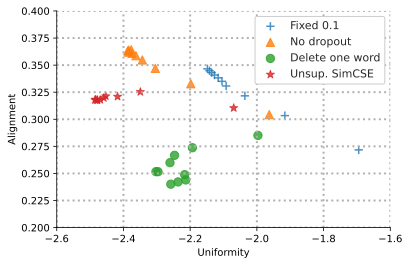

In [4]:
%config InlineBackend.figure_format = 'svg'


##### Data part #####

uniform_bert = [0, 0,-1.534595966]
align_bert = [0, 0, 0.1870056987]
stsb_bert = [30, 90, 56.7]



#uniform_simcse = [0, 0, -2.675060749053955, -3.0167946815490723, -3.1476778984069824, -3.2285654544830322, -3.260868549346924, -3.2591376304626465, -3.2826201915740967, -3.3129944801330566, -3.3257524967193604, -3.3340375423431396]
#align_simcse = [0, 0, 0.35545286536216736, 0.3485583961009979, 0.35836926102638245, 0.3643387258052826, 0.36402079463005066, 0.35836532711982727, 0.35792073607444763, 0.35898929834365845, 0.35586708784103394, 0.3510805070400238]
#stsb_simcse = [30, 90, 53.2, 63.0, 66.9, 68.4, 69.2, 70, 70.7, 71.1, 71.8, 72.6]

align_simcse =  [0.31781205534935, 0.28783777356147766, 0.2938295304775238, 0.28383761644363403, 0.27409127354621887, 0.26841580867767334, 0.2508212625980377, 0.23408104479312897, 0.22904850542545319, 0.2335101068019867]
uniform_simcse = [-2.4852781295776367, -2.403033494949341, -2.4848194122314453, -2.488508462905884, -2.474201202392578, -2.47412371635437, -2.3953325748443604, -2.4166743755340576, -2.3861083984375, -2.3951456546783447]

align_simcse = [0.31044715642929077, 0.32529833912849426, 0.3209240734577179, 0.32135531306266785, 0.3197276294231415, 0.3179779052734375, 0.31782668828964233, 0.3175710439682007, 0.318209707736969, 0.31781205534935]
uniform_simcse = [-2.069443702697754, -2.3492650985717773, -2.4176855087280273, -2.4530282020568848, -2.4589827060699463, -2.4694910049438477, -2.4779677391052246, -2.4789650440216064, -2.4835097789764404, -2.4852781295776367]

#uniform_same = [0, 0, -2.293630599975586, -2.7874538898468018, -2.956963062286377, -3.023047924041748, -3.0518112182617188, -3.065455198287964, -3.073960781097412, -3.08335018157959, -3.091421127319336, -3.096039056777954]
#align_same = [0, 0, 0.38740313053131104, 0.46028563380241394, 0.5023012757301331, 0.5282842516899109, 0.543067455291748, 0.5526134967803955, 0.5600553154945374, 0.567558228969574, 0.5733835101127625, 0.5777492523193359]
#stsb_same = [30, 90, 41.4, 48.2, 49.6, 49.7, 49.5, 49.0, 48.5, 48.1, 47.8, 47.6]

align_same = [0.3465578556060791, 0.3591233193874359, 0.36902034282684326, 0.3759707808494568, 0.3821304738521576, 0.3881807327270508, 0.39277923107147217, 0.397924542427063, 0.40214231610298157, 0.40789684653282166]
uniform_same = [-2.1482646465301514, -2.179954767227173, -2.201087236404419, -2.2155909538269043, -2.2270724773406982, -2.2362420558929443, -2.242354154586792, -2.2529871463775635, -2.2634317874908447, -2.268876314163208]

align_same = [0.2717219293117523, 0.303371787071228, 0.32162922620773315, 0.33072102069854736, 0.3350304067134857, 0.338248610496521, 0.34084880352020264, 0.3430268168449402, 0.3448152542114258, 0.3465578556060791]
uniform_same = [-1.694693922996521, -1.916066288948059, -2.035895824432373, -2.092083692550659, -2.104520797729492, -2.116023540496826, -2.1273610591888428, -2.1354360580444336, -2.1419858932495117, -2.1482646465301514]

#uniform_drop = [0, 0, -2.623530626296997, -2.9274532794952393, -3.07503080368042, -3.1565678119659424, -3.2066469192504883, -3.267467737197876, -3.2789034843444824, -3.2578742504119873, -3.2549283504486084, -3.2346317768096924]
#align_drop = [0, 0, 0.42425063252449036, 0.46813875436782837, 0.50675368309021, 0.5317960381507874, 0.5479318499565125, 0.5583418607711792, 0.5566602945327759, 0.5609102845191956, 0.5667781829833984, 0.5729426145553589]
#stsb_drop = [30, 90, 46.6, 51.4, 53.5, 54.8, 55.7, 57.7, 59.9, 60.3, 60.8, 59.0]

align_drop = [0.364217609167099, 0.39261379837989807, 0.41346824169158936, 0.40344664454460144, 0.41104376316070557, 0.4201006293296814, 0.43816202878952026, 0.4422367811203003, 0.4514498710632324, 0.4565105438232422]
uniform_drop = [-2.3767051696777344, -2.4520041942596436, -2.490952491760254, -2.371600866317749, -2.4541969299316406, -2.40390682220459, -2.4564120769500732, -2.5178422927856445, -2.541569471359253, -2.549221992492676]

align_drop = [0.30430829524993896, 0.3327958583831787, 0.3470529019832611, 0.35478776693344116, 0.3587276339530945, 0.3609514534473419, 0.3619759678840637, 0.36312761902809143, 0.3638423979282379, 0.364217609167099]
uniform_drop = [-1.9627950191497803, -2.198127508163452, -2.3045272827148438, -2.343404769897461, -2.3625612258911133, -2.3743226528167725, -2.3841657638549805, -2.387340545654297, -2.3839974403381348, -2.3767051696777344]

#uniform_deleteone = [-2.5229125022888184, -2.6897037029266357, -2.8701207637786865, -2.9968199729919434, -3.098172187805176, -3.0831716060638428, -3.0521485805511475, -3.1288552284240723, -3.048062801361084, -3.048842668533325]
#align_deleteone =  [0.32379746437072754, 0.29668983817100525, 0.3090410530567169, 0.3071998059749603, 0.298303484916687, 0.29762741923332214, 0.2959868311882019, 0.2933604419231415, 0.27723589539527893, 0.2896714210510254]

align_deleteone =  [0.24007272720336914, 0.21660277247428894, 0.22151437401771545, 0.21424390375614166, 0.2229078859090805, 0.21012361347675323, 0.21108472347259521, 0.23467859625816345, 0.21375778317451477, 0.2348744124174118]
uniform_deleteone = [-2.258108377456665, -2.2141342163085938, -2.3484537601470947, -2.2555055618286133, -2.380840301513672, -2.2668449878692627, -2.3286919593811035, -2.437558889389038, -2.379631519317627, -2.587334156036377]

align_deleteone= [0.28510618209838867, 0.27371978759765625, 0.26672250032424927, 0.25993189215660095, 0.24885720014572144, 0.2439669519662857, 0.2421458512544632, 0.25160330533981323, 0.25163930654525757, 0.24007272720336914]
uniform_deleteone =[-1.9967703819274902, -2.1932458877563477, -2.246802568435669, -2.2604451179504395, -2.2163913249969482, -2.2131574153900146, -2.2363057136535645, -2.296318531036377, -2.3025498390197754, -2.258108377456665]

##### Data part end #####


plt.figure(figsize=(3, 3))

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
# plt.rcParams.update({'font.size': 12})


fig, ax = plt.subplots()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

sns.set_color_codes("dark")

sns.set_style("whitegrid")
# sns.color_palette("rocket")

plt.grid(b=True, linestyle='dotted', lw=2)
#sns.set_theme()


#points = plt.scatter(uniform_bert, align_bert, c=stsb_bert, s=50, cmap=my_cmap, marker="0", alpha=0.8)
#points = plt.scatter(uniform_same, align_same, c=stsb_same, s=50, cmap=my_cmap, marker="+", alpha=0.8, label="Identical")
points = plt.scatter(uniform_same, align_same, s=70,  marker="+", alpha=0.8, label="Fixed 0.1")
# sns.scatterplot(x=uniform_same, y=align_same, marker="+", s=50, label="Fixed 0.1", )
#points = plt.scatter(uniform_drop, align_drop, c=stsb_drop, s=50, cmap=my_cmap, marker="^", alpha=0.8, label="No dropout")
points = plt.scatter(uniform_drop, align_drop, s=70, marker="^", alpha=0.8, label="No dropout")
# points = sns.scatterplot(uniform_drop, align_drop, s=50, marker="^", alpha=0.8, label="No dropout")
#points = plt.scatter(uniform_simcse, align_simcse, c=stsb_simcse, s=50, cmap=my_cmap, marker="*", alpha=0.8, label="Unsup. SimCSE")
points = plt.scatter(uniform_deleteone, align_deleteone, s=70, marker="o", alpha=0.8, label="Delete one word")
points = plt.scatter(uniform_simcse, align_simcse, s=70, marker="*", alpha=0.8, label="Unsup. SimCSE")
# points = sns.scatterplot(uniform_simcse, align_simcse, s=50, marker="*", alpha=0.8, label="Unsup. SimCSE")



# colorbar = plt.colorbar(points)



plt.xlabel('Uniformity')
plt.ylabel('Alignment')
plt.xlim((-2.6, -1.6))
plt.ylim((0.2, 0.4))
plt.legend(loc=1, framealpha=1, fontsize=11)
# plt.title('SST-2')

plt.savefig('identical_alighxuniform.pdf', format='pdf', bbox_inches='tight')

